# Model Evaluation

In [27]:
# Load packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Load custom modules
from gen_stars import gen_stars
from dmap import dmap
from gen_d_params import gen_d_params
from custom_functions import fetch_data, prepare_data, train_predict, pol2cart

In [2]:
# Set the style of display
plt.style.use("ggplot")
%matplotlib inline

## Distortion Maps

In [3]:
# Fetch all the data taken from a given camera
camera = "mx"
image_num = "."
image_nums_train = ["2"]
image_nums_test = ["3"]
df = fetch_data(camera, image_num)

# Create the training and test datasets
X_train, y_train = prepare_data(df, camera, image_nums=image_nums_train)
X_test, y_test = prepare_data(df, camera, image_nums=image_nums_test)

/home/sd-spare/muhammad/software/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/sd-spare/muhammad/software/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
custom_functions.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pa

In [4]:
df.err_azm_mx2.describe()

count    115.000000
mean      34.022748
std       20.017454
min        2.147886
25%       17.108948
50%       36.554175
75%       48.260529
max       89.817326
Name: err_azm_mx2, dtype: float64

## Model Evaluation

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# build a linear regression model
clf = LinearRegression()

# build a GradientBoosting Regressor model
#clf = GradientBoostingRegressor(loss="ls", learning_rate=0.1, n_estimators=10, random_state=16)

# build a Random Forest model
#clf = RandomForestRegressor(n_estimators=10, random_state=16)

# collect results on the model
samples_100 = len(X_train)
results = {}
clf_name = clf.__class__.__name__
clf = MultiOutputRegressor(clf)
results[clf_name] = train_predict(clf, samples_100, X_train, y_train, X_test, y_test)

MultiOutputRegressor trained on 42 samples.


In [15]:
data = gen_stars()
img_name = [camera + x for x in image_nums_test]
#dmap(data, x_act='x_act_', y_act='y_act_', x_img='x_img_', y_img='y_img_', err_mag='err_mag_', img_list=img_name)


TypeError: dmap() got an unexpected keyword argument 'x_act'

In [30]:
img_name_train = [camera + x for x in image_nums_train] 
img_name_test = [camera + x for x in image_nums_test]
d_orig_train = gen_d_params(img_name_train)
d_orig_test = gen_d_params(img_name_test)

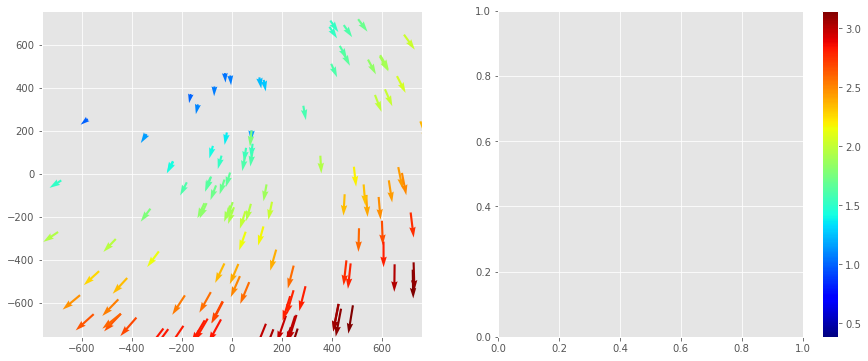

In [44]:
#data = gen_stars()
#img_name = [camera + x for x in image_nums_test][0]

# need to move origin of all pixel coordinates to center of 1520x1520 grid
offset = 759.5

#x_act = data.loc[:, "x_act_" + img_name].as_matrix()
#y_act = data.loc[:, "y_act_" + img_name].as_matrix()
#x_img = data.loc[:, "x_img_" + img_name].as_matrix()
#y_img = data.loc[:, "x_img_" + img_name].as_matrix()
#mag = data.loc[:, "err_mag_" + img_name].as_matrix()

x_act = d_orig_train["x_act"]
y_act = d_orig_train["y_act"]
x_img = d_orig_train["x_img"]
y_img = d_orig_train["y_img"]
mag = d_orig_train["mag"]

x_, y_ = pol2cart(np.deg2rad(X_test[:,1]), X_test[:, 0])
mag_ = X_test[:, 0]
#x_img = x_img + x_
#y_img = y_img + y_
#mag = mag + mag_

#x_img = [x_img[i] + x_[i] for i in range(len(x_))]
#y_img = [y_img[i] + y_[i] for i in range(len(y_))]
#mag = [mag[i] + mag_[i] for i in range(len(x_))]

v_err_x = ((x_act-offset)-(x_img-offset)).tolist()
v_err_y = ((y_act-offset)-(y_img-offset)).tolist()
v_err_loc_x = (x_img-offset).tolist()
v_err_loc_y = (y_img-offset).tolist()

#set colors of vectors to represent the relative magnitude of the error
v_colors = mag.tolist()
for i in range(len(v_colors)):
    if np.isnan(v_colors[i]) == True:
        v_colors[i] = 0.0
norm = Normalize()
norm.autoscale(v_colors)
colormap = cm.jet
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
fig, axes = plt.subplots(1,2, figsize=(15, 6))
axes[0].quiver(v_err_loc_x,v_err_loc_y,v_err_x,v_err_y, color=colormap(norm(v_colors)))
axes[0].set_xlim((-759.5,759.5))
axes[0].set_ylim((-759.5,759.5))
plt.colorbar(sm)

In [47]:
d_orig_train

{'cols': 1520,
 'img': ['mx2'],
 'mag': array([ 2.80444825,  2.82768403,  2.35070904,  2.06848374,  2.00036622,
         3.14951584,  2.26988216,  2.19350154,  1.66208062,  3.14579879,
         2.34114374,  1.94206128,  2.57854882,  2.44517852,  1.553273  ,
         1.95974743,  2.76723057,  2.47918394,  1.70980379,  1.00607853,
         2.44668143,  1.42140951,  2.17102211,  2.97989413,  3.07297527,
         2.6844085 ,  3.07355169,  2.68955349,  2.78380046,  1.59324606,
         2.50878536,  2.48787882,  1.52075277,  1.90376522,  2.66695126,
         2.652299  ,  2.81477264,  2.03097834,  2.82571336,  2.40867515,
         1.71994709,  2.02551722,  2.68642848,  3.10530449,  3.11462309,
         1.07693686,  2.5753658 ,  2.49128662,  1.37652461,  2.1538454 ,
         2.58891966,  0.38658764,  1.94728375,  2.81554346,  1.61492105,
         1.84012092,  2.98933856,  2.39297075,  2.39727867,  1.60852852,
         3.05076253,  2.80701443,  2.76531825,  2.65869385,  2.80079167,
         2.6

In [43]:
mag_

array([  476.01864921,   684.94034149,   630.01692438,   682.23156428,
         139.87133802,  1013.69073415,   644.31083073,   436.58825923,
          87.88557675,    73.21519514,   775.33476879,   555.73024319,
         104.09043232,   715.43772762,   139.72979711,   747.3964547 ,
         898.82236649,   644.72798435,   169.97474077,   167.03221995,
         591.927943  ,   455.15289146,   995.89514789,   227.88553486,
         226.36965897,   418.44027017,   344.2100719 ,   773.7671242 ,
         693.51356331,   818.38977755,   502.39523346,    69.50739241,
         540.91003771,   745.47077964,   729.22869568,   459.39461523,
         658.09794848,   679.79324658,    31.46772474,   808.33039192,
         802.20769661])